In [1]:
#Libraries
import os 
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, END, StateGraph, MessagesState
from IPython.display import display, Image

In [2]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
#Instantiate llm model
llm = ChatOpenAI(model = "gpt-4o", api_key=api_key, temperature=0)
print(llm.model_name)

gpt-4o


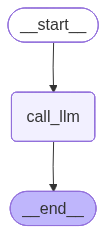

In [3]:
#create system message
sys_message = "You are a helpful customer support assistant. Answer questions to the best of your abilities"

#create node to call llm
def call_llm(state: MessagesState) -> dict:
    """
    Node to make calls to our llms
    """
    response = llm.invoke([SystemMessage(content=sys_message)] + state["messages"])
    return {"messages": AIMessage(content=response.content)}

#Initialize our graph
graph = StateGraph(MessagesState)

#Add nodes and edges to graph
graph.add_node("call_llm", call_llm)
graph.add_edge(START, "call_llm")
graph.add_edge("call_llm", END)

#Memory Saver checkpointer for memory
memory = MemorySaver()
agent = graph.compile(checkpointer=memory)

#Visualize graph
display(Image(agent.get_graph().draw_mermaid_png()))

In [8]:

#Customer Agent chatbot

def run_conversation(user_input:str, thread_id: str = "user_002"):
    #Run our graph
    response = agent.invoke({"messages": HumanMessage(user_input)},
                            config={"configurable":{"thread_id": thread_id}})
    
    #Print out responses
    messages = response["messages"]
    for message in messages:
        if isinstance(message, HumanMessage):
            print(f"User: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"AI Response: {message.content}")

In [9]:
#Test chatbot

run_conversation("Hi, my name is Sola and I like sports")

User: Hi, my name is Sola and I like sports
AI Response: Hi Sola! It's great to meet you. Sports are a fantastic way to stay active and have fun. Do you have a favorite sport or team that you follow?


In [10]:
run_conversation("Tell me everything you know about me")

User: Hi, my name is Sola and I like sports
AI Response: Hi Sola! It's great to meet you. Sports are a fantastic way to stay active and have fun. Do you have a favorite sport or team that you follow?
User: Tell me everything you know about me
AI Response: I only know what you've shared with me so far, which is that your name is Sola and you like sports. If there's anything else you'd like to share or ask about, feel free to let me know!


In [11]:
run_conversation("Give me list of country to visit on this new years eve")

User: Hi, my name is Sola and I like sports
AI Response: Hi Sola! It's great to meet you. Sports are a fantastic way to stay active and have fun. Do you have a favorite sport or team that you follow?
User: Tell me everything you know about me
AI Response: I only know what you've shared with me so far, which is that your name is Sola and you like sports. If there's anything else you'd like to share or ask about, feel free to let me know!
User: Give me list of country to visit on this new years eve
AI Response: Celebrating New Year's Eve in a different country can be an exciting experience! Here are some popular destinations known for their New Year's Eve celebrations:

1. **Sydney, Australia** - Famous for its spectacular fireworks display over the Sydney Harbour Bridge and Opera House.

2. **New York City, USA** - Known for the iconic ball drop in Times Square, attracting millions of viewers worldwide.

3. **Rio de Janeiro, Brazil** - Offers vibrant beach parties and fireworks, especia